In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA
import seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "drive/My Drive/SM_MV_.csv"
df1 = pd.read_csv(path)

In [ ]:
df1.head(3)

,Sample,LFQ_Int_CP35491,LFQ_Int_CP10882,LFQ_Int_CN06567,LFQ_Int_CP16894,LFQ_Int_CP22324,LFQ_Int_CH10571,LFQ_Int_CN30310,LFQ_Int_CP19452,LFQ_Int_CM5736,LFQ_Int_CN14704,LFQ_Int_CN39836,LFQ_Int_CP28844,LFQ_Int_CP34310,LFQ_Int_CP34241,LFQ_Int_CP34736,LFQ_Int_CP21176,LFQ_Int_CP24232,LFQ_Int_CN29552,LFQ_Int_CN36290,LFQ_Int_CP23023,LFQ_Int_CN35769
0,Label,High Grade,High Grade,High Grade,High Grade,High Grade,High Grade,High Grade,High Grade,High Grade,High Grade,High Grade,Low Grade,Low Grade,Low Grade,Low Grade,Low Grade,Low Grade,Low Grade,Low Grade,Low Grade,Low Grade
1,O00170,1002400,264920000,77973000,53329000,35962000,29680000,27150000,89497000,5429400,53955000,56093000,1404100,624790,10089000,7680300,142820000,38554000,73348000,55363000,32483000,67028000
2,O00203,19582000,277510000,70955000,44511000,46226000,90544000,49622000,10590000,3039700,11644000,73526000,1073300,428230,27073000,12165000,220850000,20057000,95088000,145520000,43779000,102500000


In [ ]:
df = df1.transpose()
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783,2784,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794,2795,2796,2797
Sample,Label,O00170,O00203,O00233,O00264,O00299,O14773,O14818,O15143,O15144,O15145,O15173,O15230,O43143,O43237,O43390,O43491,O43707,O43776,O75083,O75131,O75367,O75369,O75390,O75396,O75643,O75781,O94979,O95782,O95865,P00338,P00352,P00367,P00387,P00441,P00450,P00505,P00558,P00734,P00738,...,Q9BWF3,Q9BXX0,Q9GZU7,Q9GZY8,Q9H3K6,Q9H773,Q9H7C9,Q9H936,Q9NRN7,Q9NRY4,Q9NS86,Q9NSK0,Q9NUB1,Q9NUL5,Q9NUU6,Q9NVI7,Q9NW64,Q9NX14,Q9NXR1,Q9NZD2,Q9NZM3,Q9NZU0,Q9P1Z2,Q9UBL3,Q9UBV8,Q9UDW1,Q9UHJ6,Q9UHQ4,Q9UI08,Q9UID3,Q9UJY5,Q9UKC9,Q9UKU7,Q9Y2L1,Q9Y2W2,Q9Y320,Q9Y3B2,Q9Y3B4,Q9Y5K6,Q9Y613
LFQ_Int_CP35491,High Grade,1002400,19582000,11771000,46692000,46273000,111920000,226700000,33648000,12256000,11973000,30129000,10401000,18653000,17364000,30765000,181390000,149050000,13295000,52350000,33933000,31180000,122440000,156580000,18241000,37806000,59502000,19860000,52496000,39311000,357520000,881740000,81557000,81805000,136760000,10577000,193090000,447900000,6008300,90650000,...,9645960,10387000,7350000,32322000,36285000,13603860,121100000,11243000,12000275,6483200,16785750,35103925,3908633,18029000,7583200,4341100,30045300,15268150,4650167,1269400,7558600,12770100,9869525,15476400,15038867,11408000,48212067,7943900,28936150,6473505,4879100,44462733,6161100,1962300,5951167,5661050,71210262,10095725,13978350,10960767
LFQ_Int_CP10882,High Grade,264920000,277510000,27956000,380790000,582570000,1440200000,879030000,566050000,615600000,362140000,175040000,474840000,340040000,413320000,681810000,498200000,1413500000,81313000,705200000,334260000,827370000,3915400000,385250000,233090000,1175600000,432520000,323820000,296540000,977260000,5243400000,481160000,617430000,585150000,2027500000,399110000,545210000,5662900000,341150000,1838000000,...,142070000,74451222,62443030,73098000,133410000,34057000,122770000,28104150,11983000,24434000,12618000,114760000,10195000,36181000,12798000,21087000,48718500,38404000,32572162,62180000,40546000,35058280,59332000,28660000,16156000,6523600,291839222,73117556,51901000,11670000,33926000,144350000,47352111,102830000,44683000,20139000,20794000,66815000,17049000,46397000


In [ ]:
new_header = df.iloc[0]
new_header

0        Label
1       O00170
2       O00203
3       O00233
4       O00264
         ...  
2793    Q9Y320
2794    Q9Y3B2
2795    Q9Y3B4
2796    Q9Y5K6
2797    Q9Y613
Name: Sample, Length: 2798, dtype: object

In [ ]:
df = df[1:]
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783,2784,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794,2795,2796,2797
LFQ_Int_CP35491,High Grade,1002400,19582000,11771000,46692000,46273000,111920000,226700000,33648000,12256000,11973000,30129000,10401000,18653000,17364000,30765000,181390000,149050000,13295000,52350000,33933000,31180000,122440000,156580000,18241000,37806000,59502000,19860000,52496000,39311000,357520000,881740000,81557000,81805000,136760000,10577000,193090000,447900000,6008300,90650000,...,9645960,10387000,7350000,32322000,36285000,13603860,121100000,11243000,12000275,6483200,16785750,35103925,3908633,18029000,7583200,4341100,30045300,15268150,4650167,1269400,7558600,12770100,9869525,15476400,15038867,11408000,48212067,7943900,28936150,6473505,4879100,44462733,6161100,1962300,5951167,5661050,71210262,10095725,13978350,10960767
LFQ_Int_CP10882,High Grade,264920000,277510000,27956000,380790000,582570000,1440200000,879030000,566050000,615600000,362140000,175040000,474840000,340040000,413320000,681810000,498200000,1413500000,81313000,705200000,334260000,827370000,3915400000,385250000,233090000,1175600000,432520000,323820000,296540000,977260000,5243400000,481160000,617430000,585150000,2027500000,399110000,545210000,5662900000,341150000,1838000000,...,142070000,74451222,62443030,73098000,133410000,34057000,122770000,28104150,11983000,24434000,12618000,114760000,10195000,36181000,12798000,21087000,48718500,38404000,32572162,62180000,40546000,35058280,59332000,28660000,16156000,6523600,291839222,73117556,51901000,11670000,33926000,144350000,47352111,102830000,44683000,20139000,20794000,66815000,17049000,46397000
LFQ_Int_CN06567,High Grade,77973000,70955000,88100000,618970000,608680000,960460000,737930000,212960000,455080000,148600000,89174000,50691000,92823000,75295000,259050000,306310000,522250000,89207000,428560000,164160000,233430000,2074900000,296570000,137880000,458000000,215060000,81259000,123990000,480230000,1382900000,512960000,320250000,539210000,853420000,753160000,289620000,2841900000,180860000,1347800000,...,37353100,2626200,9200300,32948000,34287300,23632000,27662700,25848000,12853000,6552600,22892000,32927000,16092078,18934000,10149000,5589300,42867000,27022857,4059100,25532000,16590000,13948670,25809000,14520000,30544000,8055200,405110000,333090000,29728000,13700956,51953000,113300000,32361000,5259000,30879000,19527000,9032100,27914000,27056000,18316311


In [ ]:
df.columns = new_header
df.head(3)

Sample,Label,O00170,O00203,O00233,O00264,O00299,O14773,O14818,O15143,O15144,O15145,O15173,O15230,O43143,O43237,O43390,O43491,O43707,O43776,O75083,O75131,O75367,O75369,O75390,O75396,O75643,O75781,O94979,O95782,O95865,P00338,P00352,P00367,P00387,P00441,P00450,P00505,P00558,P00734,P00738,...,Q9BWF3,Q9BXX0,Q9GZU7,Q9GZY8,Q9H3K6,Q9H773,Q9H7C9,Q9H936,Q9NRN7,Q9NRY4,Q9NS86,Q9NSK0,Q9NUB1,Q9NUL5,Q9NUU6,Q9NVI7,Q9NW64,Q9NX14,Q9NXR1,Q9NZD2,Q9NZM3,Q9NZU0,Q9P1Z2,Q9UBL3,Q9UBV8,Q9UDW1,Q9UHJ6,Q9UHQ4,Q9UI08,Q9UID3,Q9UJY5,Q9UKC9,Q9UKU7,Q9Y2L1,Q9Y2W2,Q9Y320,Q9Y3B2,Q9Y3B4,Q9Y5K6,Q9Y613
LFQ_Int_CP35491,High Grade,1002400,19582000,11771000,46692000,46273000,111920000,226700000,33648000,12256000,11973000,30129000,10401000,18653000,17364000,30765000,181390000,149050000,13295000,52350000,33933000,31180000,122440000,156580000,18241000,37806000,59502000,19860000,52496000,39311000,357520000,881740000,81557000,81805000,136760000,10577000,193090000,447900000,6008300,90650000,...,9645960,10387000,7350000,32322000,36285000,13603860,121100000,11243000,12000275,6483200,16785750,35103925,3908633,18029000,7583200,4341100,30045300,15268150,4650167,1269400,7558600,12770100,9869525,15476400,15038867,11408000,48212067,7943900,28936150,6473505,4879100,44462733,6161100,1962300,5951167,5661050,71210262,10095725,13978350,10960767
LFQ_Int_CP10882,High Grade,264920000,277510000,27956000,380790000,582570000,1440200000,879030000,566050000,615600000,362140000,175040000,474840000,340040000,413320000,681810000,498200000,1413500000,81313000,705200000,334260000,827370000,3915400000,385250000,233090000,1175600000,432520000,323820000,296540000,977260000,5243400000,481160000,617430000,585150000,2027500000,399110000,545210000,5662900000,341150000,1838000000,...,142070000,74451222,62443030,73098000,133410000,34057000,122770000,28104150,11983000,24434000,12618000,114760000,10195000,36181000,12798000,21087000,48718500,38404000,32572162,62180000,40546000,35058280,59332000,28660000,16156000,6523600,291839222,73117556,51901000,11670000,33926000,144350000,47352111,102830000,44683000,20139000,20794000,66815000,17049000,46397000
LFQ_Int_CN06567,High Grade,77973000,70955000,88100000,618970000,608680000,960460000,737930000,212960000,455080000,148600000,89174000,50691000,92823000,75295000,259050000,306310000,522250000,89207000,428560000,164160000,233430000,2074900000,296570000,137880000,458000000,215060000,81259000,123990000,480230000,1382900000,512960000,320250000,539210000,853420000,753160000,289620000,2841900000,180860000,1347800000,...,37353100,2626200,9200300,32948000,34287300,23632000,27662700,25848000,12853000,6552600,22892000,32927000,16092078,18934000,10149000,5589300,42867000,27022857,4059100,25532000,16590000,13948670,25809000,14520000,30544000,8055200,405110000,333090000,29728000,13700956,51953000,113300000,32361000,5259000,30879000,19527000,9032100,27914000,27056000,18316311


In [ ]:
x = df.columns
x = x[1:2798]
x1 = x.values.tolist()
# x1

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [ ]:
df1 = df.drop(['Label'], axis=1, inplace=False)
df1.head(3)

Sample,O00170,O00203,O00233,O00264,O00299,O14773,O14818,O15143,O15144,O15145,O15173,O15230,O43143,O43237,O43390,O43491,O43707,O43776,O75083,O75131,O75367,O75369,O75390,O75396,O75643,O75781,O94979,O95782,O95865,P00338,P00352,P00367,P00387,P00441,P00450,P00505,P00558,P00734,P00738,P00747,...,Q9BWF3,Q9BXX0,Q9GZU7,Q9GZY8,Q9H3K6,Q9H773,Q9H7C9,Q9H936,Q9NRN7,Q9NRY4,Q9NS86,Q9NSK0,Q9NUB1,Q9NUL5,Q9NUU6,Q9NVI7,Q9NW64,Q9NX14,Q9NXR1,Q9NZD2,Q9NZM3,Q9NZU0,Q9P1Z2,Q9UBL3,Q9UBV8,Q9UDW1,Q9UHJ6,Q9UHQ4,Q9UI08,Q9UID3,Q9UJY5,Q9UKC9,Q9UKU7,Q9Y2L1,Q9Y2W2,Q9Y320,Q9Y3B2,Q9Y3B4,Q9Y5K6,Q9Y613
LFQ_Int_CP35491,1002400,19582000,11771000,46692000,46273000,111920000,226700000,33648000,12256000,11973000,30129000,10401000,18653000,17364000,30765000,181390000,149050000,13295000,52350000,33933000,31180000,122440000,156580000,18241000,37806000,59502000,19860000,52496000,39311000,357520000,881740000,81557000,81805000,136760000,10577000,193090000,447900000,6008300,90650000,4565800,...,9645960,10387000,7350000,32322000,36285000,13603860,121100000,11243000,12000275,6483200,16785750,35103925,3908633,18029000,7583200,4341100,30045300,15268150,4650167,1269400,7558600,12770100,9869525,15476400,15038867,11408000,48212067,7943900,28936150,6473505,4879100,44462733,6161100,1962300,5951167,5661050,71210262,10095725,13978350,10960767
LFQ_Int_CP10882,264920000,277510000,27956000,380790000,582570000,1440200000,879030000,566050000,615600000,362140000,175040000,474840000,340040000,413320000,681810000,498200000,1413500000,81313000,705200000,334260000,827370000,3915400000,385250000,233090000,1175600000,432520000,323820000,296540000,977260000,5243400000,481160000,617430000,585150000,2027500000,399110000,545210000,5662900000,341150000,1838000000,194490000,...,142070000,74451222,62443030,73098000,133410000,34057000,122770000,28104150,11983000,24434000,12618000,114760000,10195000,36181000,12798000,21087000,48718500,38404000,32572162,62180000,40546000,35058280,59332000,28660000,16156000,6523600,291839222,73117556,51901000,11670000,33926000,144350000,47352111,102830000,44683000,20139000,20794000,66815000,17049000,46397000
LFQ_Int_CN06567,77973000,70955000,88100000,618970000,608680000,960460000,737930000,212960000,455080000,148600000,89174000,50691000,92823000,75295000,259050000,306310000,522250000,89207000,428560000,164160000,233430000,2074900000,296570000,137880000,458000000,215060000,81259000,123990000,480230000,1382900000,512960000,320250000,539210000,853420000,753160000,289620000,2841900000,180860000,1347800000,196950000,...,37353100,2626200,9200300,32948000,34287300,23632000,27662700,25848000,12853000,6552600,22892000,32927000,16092078,18934000,10149000,5589300,42867000,27022857,4059100,25532000,16590000,13948670,25809000,14520000,30544000,8055200,405110000,333090000,29728000,13700956,51953000,113300000,32361000,5259000,30879000,19527000,9032100,27914000,27056000,18316311


In [ ]:
df_robust = pd.DataFrame(StandardScaler().fit_transform(df1), columns=df1.columns)
df_robust.head(3)

Sample,O00170,O00203,O00233,O00264,O00299,O14773,O14818,O15143,O15144,O15145,O15173,O15230,O43143,O43237,O43390,O43491,O43707,O43776,O75083,O75131,O75367,O75369,O75390,O75396,O75643,O75781,O94979,O95782,O95865,P00338,P00352,P00367,P00387,P00441,P00450,P00505,P00558,P00734,P00738,P00747,...,Q9BWF3,Q9BXX0,Q9GZU7,Q9GZY8,Q9H3K6,Q9H773,Q9H7C9,Q9H936,Q9NRN7,Q9NRY4,Q9NS86,Q9NSK0,Q9NUB1,Q9NUL5,Q9NUU6,Q9NVI7,Q9NW64,Q9NX14,Q9NXR1,Q9NZD2,Q9NZM3,Q9NZU0,Q9P1Z2,Q9UBL3,Q9UBV8,Q9UDW1,Q9UHJ6,Q9UHQ4,Q9UI08,Q9UID3,Q9UJY5,Q9UKC9,Q9UKU7,Q9Y2L1,Q9Y2W2,Q9Y320,Q9Y3B2,Q9Y3B4,Q9Y5K6,Q9Y613
0,-0.897577,-0.638089,-0.918204,-0.759059,-0.993980,-0.936530,-0.557747,-0.920684,-1.180337,-0.833066,-0.770158,-0.619115,-0.716727,-0.662162,-0.926227,-0.647709,-0.853046,-1.029887,-0.933238,-0.750464,-0.667547,-0.977013,-0.119532,-0.910556,-0.827319,-0.724254,-0.911584,-0.518087,-0.933675,-0.820062,0.400321,-0.642408,-0.690601,-0.808883,-0.765635,-0.029432,-0.895834,-0.885814,-0.771701,-0.999144,...,-0.689130,-0.584686,-0.608469,-0.287389,-0.156645,-0.295946,2.134729,-0.668567,-0.263919,-0.552425,-0.040014,-0.081196,-0.583752,0.116635,-0.718713,-0.996876,0.336850,-0.356452,-0.301559,-1.142017,-1.058573,-0.528079,-0.344680,-0.276146,-0.327888,-0.210961,-0.479385,-0.607379,-0.646881,-0.462104,-0.891925,-0.619933,-0.464869,-0.665900,-1.265960,-0.382449,2.450003,-1.206306,-0.371111,-0.251862
1,3.611132,2.980736,-0.698088,0.101923,1.098640,2.444960,1.515920,2.173013,2.018392,2.415767,1.681002,3.690813,2.838743,3.851151,2.577933,0.475953,1.771916,0.312436,1.524228,1.974147,1.245417,2.748417,1.599459,2.503050,2.650067,2.177239,2.183541,2.774015,2.368249,2.582907,-0.262119,2.525398,0.824328,2.339652,0.221355,2.212387,2.840992,0.968222,2.614788,0.027485,...,3.772163,0.281989,2.800382,1.905924,3.125590,1.979472,2.178964,0.291238,-0.264195,0.377461,-0.278437,1.998529,-0.286494,1.146796,-0.458529,0.646032,1.938439,0.820016,0.146234,1.352626,1.418702,1.403444,1.863034,-0.064267,-0.309756,-0.290482,0.092495,0.316297,0.642166,-0.211039,0.253334,0.006590,0.215958,2.673259,0.854461,-0.056792,0.041183,1.964919,-0.201938,0.323901
2,0.417371,0.082693,0.119870,0.715721,1.200521,1.223655,1.067382,0.121267,1.167368,0.434553,0.228584,-0.245229,0.103807,-0.001834,0.302486,-0.204642,-0.078294,0.468223,0.482896,0.430974,-0.181612,0.940686,0.932821,0.990316,0.456900,0.485743,-0.286378,0.446352,0.618521,-0.105894,-0.209532,0.768622,0.686061,0.384528,1.120748,0.585140,0.819595,0.081483,1.664746,0.040782,...,0.244308,-0.689676,-0.493983,-0.253717,-0.224155,0.819687,-0.340264,0.162809,-0.250280,-0.548830,0.309305,-0.138033,-0.007645,0.167996,-0.590697,-0.874417,1.436560,0.241280,-0.311038,-0.148323,-0.380336,-0.425942,0.366764,-0.291517,-0.076223,-0.265547,0.358382,4.000769,-0.602433,-0.112915,0.964101,-0.188165,-0.031823,-0.556765,0.098744,-0.070558,-0.520784,-0.210070,0.349382,-0.132350


In [ ]:
X_std = StandardScaler().fit_transform(df1)
X_std

array([[-0.8975772 , -0.63808854, -0.91820375, ..., -1.2063058 ,
        -0.37111079, -0.25186191],
       [ 3.61113199,  2.9807359 , -0.69808786, ...,  1.96491939,
        -0.20193817,  0.32390119],
       [ 0.4173713 ,  0.08269349,  0.11987015, ..., -0.21007017,
         0.34938169, -0.13235003],
       ...,
       [ 0.03110712,  1.12886779,  0.03969819, ..., -0.7990355 ,
        -0.40754682, -0.21419557],
       [-0.35976967, -0.29859576,  0.02393579, ..., -0.34155302,
        -0.13290612, -0.10769877],
       [ 0.23038937,  0.52528141,  0.51467796, ...,  0.25389584,
        -0.39415912, -0.20321202]])

In [ ]:
mean_vec = np.mean(X_std,axis = 0)
cov_mat = (X_std - mean_vec).T.dot((X_std-mean_vec))/ (X_std.shape[0]-1)

In [ ]:
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.05        0.90736153  0.2911117  ...  0.59821483  0.01100223
  -0.07060035]
 [ 0.90736153  1.05        0.47043016 ...  0.62413063 -0.03268425
  -0.09215782]
 [ 0.2911117   0.47043016  1.05       ...  0.5934488   0.05320153
  -0.16789642]
 ...
 [ 0.59821483  0.62413063  0.5934488  ...  1.05       -0.17401709
  -0.27470341]
 [ 0.01100223 -0.03268425  0.05320153 ... -0.17401709  1.05
   0.94057355]
 [-0.07060035 -0.09215782 -0.16789642 ... -0.27470341  0.94057355
   1.05      ]]


In [ ]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [ ]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[ 2.36817545e-02+0.00000000e+00j  1.59173650e-02+0.00000000e+00j
  -1.14564273e-02+0.00000000e+00j ...  4.50371482e-03-3.46751650e-03j
   5.47342212e-03-1.11075501e-05j  5.47342212e-03+1.11075501e-05j]
 [ 2.49499986e-02+0.00000000e+00j  3.63859228e-03+0.00000000e+00j
  -1.79440398e-03+0.00000000e+00j ...  1.97050816e-04-3.02417497e-05j
   1.55178288e-04-7.56603169e-05j  1.55178288e-04+7.56603169e-05j]
 [ 1.57833868e-02+0.00000000e+00j -3.40909363e-02+0.00000000e+00j
   1.72288496e-02+0.00000000e+00j ... -8.12826805e-05-2.76845899e-04j
  -3.90688888e-04-1.47802460e-04j -3.90688888e-04+1.47802460e-04j]
 ...
 [ 1.82648009e-02+0.00000000e+00j  1.05128091e-03+0.00000000e+00j
  -2.11753707e-02+0.00000000e+00j ...  3.20769323e-03+2.32214580e-02j
   1.52920975e-02-4.05207716e-03j  1.52920975e-02+4.05207716e-03j]
 [ 2.05903348e-03+0.00000000e+00j  2.91035906e-02+0.00000000e+00j
   5.58163862e-02+0.00000000e+00j ... -9.88852053e-03+1.06821345e-02j
   1.55627716e-03-4.28813673e-03j

In [ ]:
print('Eigenvalues \n%s' %eig_vals)

Eigenvalues 
[1.41531275e+03+0.00000000e+00j 2.39786719e+02+0.00000000e+00j
 2.15960398e+02+0.00000000e+00j ... 2.44404290e-16-9.90664047e-17j
 4.65629987e-18+2.05389424e-16j 4.65629987e-18-2.05389424e-16j]


In [ ]:
eig = pd.DataFrame(eig_vals)
eig.rename({0:'Eigenvalues'},axis = 1, inplace=True)
eig

,Eigenvalues
0,1.415313e+03+0.000000e+00j
1,2.397867e+02+0.000000e+00j
2,2.159604e+02+0.000000e+00j
3,1.810217e+02+0.000000e+00j
4,1.321263e+02+0.000000e+00j
...,...
2792,6.799076e-17+0.000000e+00j
2793,2.444043e-16+9.906640e-17j
2794,2.444043e-16-9.906640e-17j
2795,4.656300e-18+2.053894e-16j


In [ ]:
eig.insert(0,"Peptides",x1,allow_duplicates=False)
eig.head()

,Peptides,Eigenvalues
0,O00170,1415.312746+0.000000j
1,O00203,239.786719+0.000000j
2,O00233,215.960398+0.000000j
3,O00264,181.021713+0.000000j
4,O00299,132.126277+0.000000j


In [ ]:
pca = PCA(n_components=2)
pca.fit_transform(df_robust)

array([[-2.90640108e+01, -1.85214723e+00],
       [ 9.39183908e+01,  4.37723650e+01],
       [ 1.82420067e+01, -1.04072630e+01],
       [ 7.58310742e+00, -4.24222764e+00],
       [-9.57029076e+00, -2.33869242e+00],
       [-5.79625688e+00, -2.64628453e+00],
       [-1.68723236e+01, -3.04415479e+00],
       [-2.20448330e+01, -5.51630617e-01],
       [-2.74253371e+01,  4.01174959e+01],
       [-2.06657324e+01, -9.81147838e-01],
       [ 1.83237319e+01, -8.89992590e+00],
       [-3.73777171e+01,  1.99914913e+00],
       [-3.99414887e+01,  5.58365210e-01],
       [-2.77796041e+01,  3.64157526e-02],
       [-3.31136443e+01, -1.64713903e-02],
       [ 8.68338280e+01, -2.90476898e+01],
       [-2.02410130e+01,  5.65226193e-01],
       [ 5.40452309e+01, -8.69603352e-01],
       [ 5.46148735e+00, -7.98761778e+00],
       [-2.89605379e+00, -3.50585711e+00],
       [ 8.38052227e+00, -1.06583039e+01]])

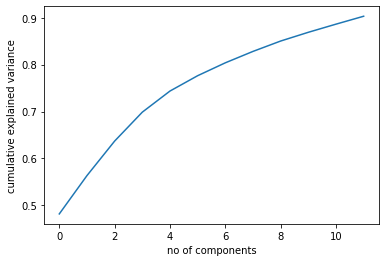

In [ ]:
pca = PCA(n_components=0.9).fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
pca.n_components_

12

In [ ]:
pca.explained_variance_ratio_

array([0.48191523, 0.08164759, 0.0735347 , 0.06163805, 0.04498911,
       0.03268346, 0.02747106, 0.02430601, 0.022107  , 0.01862011,
       0.01734761, 0.01685294])

In [ ]:
df_new = pd.DataFrame(pca.components_,columns=df_robust.columns)
df_new

Sample,O00170,O00203,O00233,O00264,O00299,O14773,O14818,O15143,O15144,O15145,O15173,O15230,O43143,O43237,O43390,O43491,O43707,O43776,O75083,O75131,O75367,O75369,O75390,O75396,O75643,O75781,O94979,O95782,O95865,P00338,P00352,P00367,P00387,P00441,P00450,P00505,P00558,P00734,P00738,P00747,...,Q9BWF3,Q9BXX0,Q9GZU7,Q9GZY8,Q9H3K6,Q9H773,Q9H7C9,Q9H936,Q9NRN7,Q9NRY4,Q9NS86,Q9NSK0,Q9NUB1,Q9NUL5,Q9NUU6,Q9NVI7,Q9NW64,Q9NX14,Q9NXR1,Q9NZD2,Q9NZM3,Q9NZU0,Q9P1Z2,Q9UBL3,Q9UBV8,Q9UDW1,Q9UHJ6,Q9UHQ4,Q9UI08,Q9UID3,Q9UJY5,Q9UKC9,Q9UKU7,Q9Y2L1,Q9Y2W2,Q9Y320,Q9Y3B2,Q9Y3B4,Q9Y5K6,Q9Y613
0,0.023682,0.024950,0.015783,0.020174,0.021878,0.022757,0.024962,0.024714,0.024996,0.024272,0.023786,0.019265,0.026344,0.022145,0.026744,0.022232,0.025570,0.021276,0.023840,0.025566,0.023162,0.025595,0.024467,0.024052,0.025005,0.022702,0.025415,0.025622,0.024400,0.016730,0.003531,0.024683,0.017628,0.024637,0.003002,0.024008,0.025341,0.003375,0.011259,0.002318,...,0.020610,0.008132,0.006547,0.016773,0.018634,0.007986,0.016680,0.005684,-0.005142,-0.001548,0.004322,0.009132,0.003753,0.005620,-0.001226,0.019085,0.011204,0.020329,-0.001124,0.017103,0.013741,0.004462,0.017057,-0.004969,-0.000075,-0.003698,0.003906,0.007332,0.017253,0.010683,0.006332,0.013950,0.000741,0.010540,0.019491,-0.002056,-0.000440,0.018265,0.002059,-0.001725
1,0.015917,0.003639,-0.034091,-0.026722,-0.021523,0.003533,-0.015924,-0.005429,-0.008895,0.005216,-0.007800,0.029980,0.004940,0.026204,0.000371,-0.025957,-0.007593,-0.028785,-0.011485,-0.009050,-0.015106,0.003754,-0.009201,-0.000366,0.011107,-0.000859,-0.005715,0.001574,-0.002216,0.008820,0.006690,0.002712,-0.014803,0.008067,0.026077,-0.000797,0.005702,0.042351,0.040056,0.022593,...,0.035797,-0.001793,0.026934,0.002020,0.016297,0.025509,0.005468,-0.009914,0.037813,0.037737,-0.014269,0.046108,-0.012778,0.029176,0.010180,-0.013566,0.017563,-0.024561,0.039997,-0.004464,-0.003852,0.005077,0.013537,0.040244,0.031805,0.037742,-0.005752,-0.011319,-0.017758,-0.011560,0.003547,-0.028132,0.040052,0.052085,-0.014268,0.038179,-0.005771,0.001051,0.029104,0.043169
2,-0.011456,-0.001794,0.017229,0.019683,0.018515,-0.011553,0.002685,-0.000236,0.002031,-0.010724,0.001141,-0.014690,-0.007249,-0.022941,-0.001159,0.009926,-0.001428,0.006718,0.007449,0.005425,0.013117,-0.007573,-0.005638,-0.004272,0.010400,-0.002204,-0.005229,-0.010081,0.002721,-0.003700,0.029513,-0.006246,0.012477,0.000466,0.048863,-0.014044,-0.001212,0.043001,0.022863,0.036991,...,-0.000673,-0.008158,-0.031034,-0.014918,-0.018584,-0.000612,-0.017435,-0.007163,0.049051,0.037291,-0.000075,0.039885,0.002783,0.039708,0.040213,0.003882,0.002917,0.022786,0.050228,-0.006532,-0.013947,-0.018211,-0.018694,0.045714,0.053610,0.051485,0.008039,0.008729,0.006639,0.041510,0.036026,0.019047,0.050670,0.025403,0.000769,0.050955,-0.012177,-0.021175,0.055816,0.048803
3,-0.018721,-0.015144,0.004011,0.011921,-0.009579,0.009286,0.002136,-0.006454,-0.003439,0.015724,0.019383,0.000316,-0.002472,0.001124,-0.002937,0.010202,0.012461,0.012244,0.009596,0.000745,-0.008798,0.003055,0.021755,0.005633,-0.007739,0.011687,0.000124,-0.004336,-0.009389,-0.003351,0.010101,0.011920,0.018747,0.020916,0.022196,0.018158,0.001275,0.016788,-0.003495,0.027367,...,-0.010564,0.044061,-0.018972,0.005444,-0.016086,-0.008965,0.003148,0.003605,0.008416,0.013686,-0.002760,-0.002388,-0.009623,-0.017687,0.000480,0.004811,0.001795,-0.025596,0.008045,0.005659,-0.007348,-0.005264,0.044339,0.007108,0.013006,0.012740,0.002602,0.008007,-0.007142,-0.021130,-0.007837,-0.021141,0.014855,-0.003844,0.004976,0.011115,-0.005548,0.007588,0.012286,0.008356
4,0.011806,0.012808,-0.023038,-0.004033,0.028191,0.020464,0.001659,-0.003050,0.010624,-0.003348,0.014337,0.017580,-0.008118,0.014540,-0.004531,-0.002833,-0.013328,0.003796,0.015505,0.006388,-0.024641,0.013111,-0.006528,0.031187,-0.012608,0.022655,-0.004103,0.006960,0.011702,0.051069,-0.000057,0.017881,0.037574,0.001986,0.036747,-0.001662,0.025594,0.012935,0.037220,0.019571,...,0.003457,0.011491,-0.003382,0.00522

In [ ]:
df_new = pd.DataFrame(pca.components_,columns=df_robust.columns)
df_new

Sample,O00170,O00203,O00233,O00264,O00299,O14773,O14818,O15143,O15144,O15145,O15173,O15230,O43143,O43237,O43390,O43491,O43707,O43776,O75083,O75131,O75367,O75369,O75390,O75396,O75643,O75781,O94979,O95782,O95865,P00338,P00352,P00367,P00387,P00441,P00450,P00505,P00558,P00734,P00738,P00747,...,Q9BWF3,Q9BXX0,Q9GZU7,Q9GZY8,Q9H3K6,Q9H773,Q9H7C9,Q9H936,Q9NRN7,Q9NRY4,Q9NS86,Q9NSK0,Q9NUB1,Q9NUL5,Q9NUU6,Q9NVI7,Q9NW64,Q9NX14,Q9NXR1,Q9NZD2,Q9NZM3,Q9NZU0,Q9P1Z2,Q9UBL3,Q9UBV8,Q9UDW1,Q9UHJ6,Q9UHQ4,Q9UI08,Q9UID3,Q9UJY5,Q9UKC9,Q9UKU7,Q9Y2L1,Q9Y2W2,Q9Y320,Q9Y3B2,Q9Y3B4,Q9Y5K6,Q9Y613
0,0.023682,0.024950,0.015783,0.020174,0.021878,0.022757,0.024962,0.024714,0.024996,0.024272,0.023786,0.019265,0.026344,0.022145,0.026744,0.022232,0.025570,0.021276,0.023840,0.025566,0.023162,0.025595,0.024467,0.024052,0.025005,0.022702,0.025415,0.025622,0.024400,0.016730,0.003531,0.024683,0.017628,0.024637,0.003002,0.024008,0.025341,0.003375,0.011259,0.002318,...,0.020610,0.008132,0.006547,0.016773,0.018634,0.007986,0.016680,0.005684,-0.005142,-0.001548,0.004322,0.009132,0.003753,0.005620,-0.001226,0.019085,0.011204,0.020329,-0.001124,0.017103,0.013741,0.004462,0.017057,-0.004969,-0.000075,-0.003698,0.003906,0.007332,0.017253,0.010683,0.006332,0.013950,0.000741,0.010540,0.019491,-0.002056,-0.000440,0.018265,0.002059,-0.001725
1,0.015917,0.003639,-0.034091,-0.026722,-0.021523,0.003533,-0.015924,-0.005429,-0.008895,0.005216,-0.007800,0.029980,0.004940,0.026204,0.000371,-0.025957,-0.007593,-0.028785,-0.011485,-0.009050,-0.015106,0.003754,-0.009201,-0.000366,0.011107,-0.000859,-0.005715,0.001574,-0.002216,0.008820,0.006690,0.002712,-0.014803,0.008067,0.026077,-0.000797,0.005702,0.042351,0.040056,0.022593,...,0.035797,-0.001793,0.026934,0.002020,0.016297,0.025509,0.005468,-0.009914,0.037813,0.037737,-0.014269,0.046108,-0.012778,0.029176,0.010180,-0.013566,0.017563,-0.024561,0.039997,-0.004464,-0.003852,0.005077,0.013537,0.040244,0.031805,0.037742,-0.005752,-0.011319,-0.017758,-0.011560,0.003547,-0.028132,0.040052,0.052085,-0.014268,0.038179,-0.005771,0.001051,0.029104,0.043169
2,-0.011456,-0.001794,0.017229,0.019683,0.018515,-0.011553,0.002685,-0.000236,0.002031,-0.010724,0.001141,-0.014690,-0.007249,-0.022941,-0.001159,0.009926,-0.001428,0.006718,0.007449,0.005425,0.013117,-0.007573,-0.005638,-0.004272,0.010400,-0.002204,-0.005229,-0.010081,0.002721,-0.003700,0.029513,-0.006246,0.012477,0.000466,0.048863,-0.014044,-0.001212,0.043001,0.022863,0.036991,...,-0.000673,-0.008158,-0.031034,-0.014918,-0.018584,-0.000612,-0.017435,-0.007163,0.049051,0.037291,-0.000075,0.039885,0.002783,0.039708,0.040213,0.003882,0.002917,0.022786,0.050228,-0.006532,-0.013947,-0.018211,-0.018694,0.045714,0.053610,0.051485,0.008039,0.008729,0.006639,0.041510,0.036026,0.019047,0.050670,0.025403,0.000769,0.050955,-0.012177,-0.021175,0.055816,0.048803
3,-0.018721,-0.015144,0.004011,0.011921,-0.009579,0.009286,0.002136,-0.006454,-0.003439,0.015724,0.019383,0.000316,-0.002472,0.001124,-0.002937,0.010202,0.012461,0.012244,0.009596,0.000745,-0.008798,0.003055,0.021755,0.005633,-0.007739,0.011687,0.000124,-0.004336,-0.009389,-0.003351,0.010101,0.011920,0.018747,0.020916,0.022196,0.018158,0.001275,0.016788,-0.003495,0.027367,...,-0.010564,0.044061,-0.018972,0.005444,-0.016086,-0.008965,0.003148,0.003605,0.008416,0.013686,-0.002760,-0.002388,-0.009623,-0.017687,0.000480,0.004811,0.001795,-0.025596,0.008045,0.005659,-0.007348,-0.005264,0.044339,0.007108,0.013006,0.012740,0.002602,0.008007,-0.007142,-0.021130,-0.007837,-0.021141,0.014855,-0.003844,0.004976,0.011115,-0.005548,0.007588,0.012286,0.008356
4,0.011806,0.012808,-0.023038,-0.004033,0.028191,0.020464,0.001659,-0.003050,0.010624,-0.003348,0.014337,0.017580,-0.008118,0.014540,-0.004531,-0.002833,-0.013328,0.003796,0.015505,0.006388,-0.024641,0.013111,-0.006528,0.031187,-0.012608,0.022655,-0.004103,0.006960,0.011702,0.051069,-0.000057,0.017881,0.037574,0.001986,0.036747,-0.001662,0.025594,0.012935,0.037220,0.019571,...,0.003457,0.011491,-0.003382,0.00522

In [ ]:
dff = df_new.apply(abs)
dff

Sample,O00170,O00203,O00233,O00264,O00299,O14773,O14818,O15143,O15144,O15145,O15173,O15230,O43143,O43237,O43390,O43491,O43707,O43776,O75083,O75131,O75367,O75369,O75390,O75396,O75643,O75781,O94979,O95782,O95865,P00338,P00352,P00367,P00387,P00441,P00450,P00505,P00558,P00734,P00738,P00747,...,Q9BWF3,Q9BXX0,Q9GZU7,Q9GZY8,Q9H3K6,Q9H773,Q9H7C9,Q9H936,Q9NRN7,Q9NRY4,Q9NS86,Q9NSK0,Q9NUB1,Q9NUL5,Q9NUU6,Q9NVI7,Q9NW64,Q9NX14,Q9NXR1,Q9NZD2,Q9NZM3,Q9NZU0,Q9P1Z2,Q9UBL3,Q9UBV8,Q9UDW1,Q9UHJ6,Q9UHQ4,Q9UI08,Q9UID3,Q9UJY5,Q9UKC9,Q9UKU7,Q9Y2L1,Q9Y2W2,Q9Y320,Q9Y3B2,Q9Y3B4,Q9Y5K6,Q9Y613
0,0.023682,0.024950,0.015783,0.020174,0.021878,0.022757,0.024962,0.024714,0.024996,0.024272,0.023786,0.019265,0.026344,0.022145,0.026744,0.022232,0.025570,0.021276,0.023840,0.025566,0.023162,0.025595,0.024467,0.024052,0.025005,0.022702,0.025415,0.025622,0.024400,0.016730,0.003531,0.024683,0.017628,0.024637,0.003002,0.024008,0.025341,0.003375,0.011259,0.002318,...,0.020610,0.008132,0.006547,0.016773,0.018634,0.007986,0.016680,0.005684,0.005142,0.001548,0.004322,0.009132,0.003753,0.005620,0.001226,0.019085,0.011204,0.020329,0.001124,0.017103,0.013741,0.004462,0.017057,0.004969,0.000075,0.003698,0.003906,0.007332,0.017253,0.010683,0.006332,0.013950,0.000741,0.010540,0.019491,0.002056,0.000440,0.018265,0.002059,0.001725
1,0.015917,0.003639,0.034091,0.026722,0.021523,0.003533,0.015924,0.005429,0.008895,0.005216,0.007800,0.029980,0.004940,0.026204,0.000371,0.025957,0.007593,0.028785,0.011485,0.009050,0.015106,0.003754,0.009201,0.000366,0.011107,0.000859,0.005715,0.001574,0.002216,0.008820,0.006690,0.002712,0.014803,0.008067,0.026077,0.000797,0.005702,0.042351,0.040056,0.022593,...,0.035797,0.001793,0.026934,0.002020,0.016297,0.025509,0.005468,0.009914,0.037813,0.037737,0.014269,0.046108,0.012778,0.029176,0.010180,0.013566,0.017563,0.024561,0.039997,0.004464,0.003852,0.005077,0.013537,0.040244,0.031805,0.037742,0.005752,0.011319,0.017758,0.011560,0.003547,0.028132,0.040052,0.052085,0.014268,0.038179,0.005771,0.001051,0.029104,0.043169
2,0.011456,0.001794,0.017229,0.019683,0.018515,0.011553,0.002685,0.000236,0.002031,0.010724,0.001141,0.014690,0.007249,0.022941,0.001159,0.009926,0.001428,0.006718,0.007449,0.005425,0.013117,0.007573,0.005638,0.004272,0.010400,0.002204,0.005229,0.010081,0.002721,0.003700,0.029513,0.006246,0.012477,0.000466,0.048863,0.014044,0.001212,0.043001,0.022863,0.036991,...,0.000673,0.008158,0.031034,0.014918,0.018584,0.000612,0.017435,0.007163,0.049051,0.037291,0.000075,0.039885,0.002783,0.039708,0.040213,0.003882,0.002917,0.022786,0.050228,0.006532,0.013947,0.018211,0.018694,0.045714,0.053610,0.051485,0.008039,0.008729,0.006639,0.041510,0.036026,0.019047,0.050670,0.025403,0.000769,0.050955,0.012177,0.021175,0.055816,0.048803
3,0.018721,0.015144,0.004011,0.011921,0.009579,0.009286,0.002136,0.006454,0.003439,0.015724,0.019383,0.000316,0.002472,0.001124,0.002937,0.010202,0.012461,0.012244,0.009596,0.000745,0.008798,0.003055,0.021755,0.005633,0.007739,0.011687,0.000124,0.004336,0.009389,0.003351,0.010101,0.011920,0.018747,0.020916,0.022196,0.018158,0.001275,0.016788,0.003495,0.027367,...,0.010564,0.044061,0.018972,0.005444,0.016086,0.008965,0.003148,0.003605,0.008416,0.013686,0.002760,0.002388,0.009623,0.017687,0.000480,0.004811,0.001795,0.025596,0.008045,0.005659,0.007348,0.005264,0.044339,0.007108,0.013006,0.012740,0.002602,0.008007,0.007142,0.021130,0.007837,0.021141,0.014855,0.003844,0.004976,0.011115,0.005548,0.007588,0.012286,0.008356
4,0.011806,0.012808,0.023038,0.004033,0.028191,0.020464,0.001659,0.003050,0.010624,0.003348,0.014337,0.017580,0.008118,0.014540,0.004531,0.002833,0.013328,0.003796,0.015505,0.006388,0.024641,0.013111,0.006528,0.031187,0.012608,0.022655,0.004103,0.006960,0.011702,0.051069,0.000057,0.017881,0.037574,0.001986,0.036747,0.001662,0.025594,0.012935,0.037220,0.019571,...,0.003457,0.011491,0.003382,0.005228,0.001816,0.006666,0.007815,0.006013,0.016008,0.003352,0.017308,0.003485,0.022946,0.015268,0.012247,0.038628,0.009156,0.0021

In [ ]:
a = dff.sum(axis=0)
b = a.sort_values(ascending=False)
b

Sample
O43175    0.330887
P09471    0.329201
Q5THK1    0.327736
Q86UU1    0.326203
P60201    0.315361
            ...   
P37108    0.072157
Q12906    0.071231
P11142    0.070898
P23246    0.069462
P61158    0.065764
Length: 2797, dtype: float64

In [ ]:
b.head(10)

Sample
O43175    0.330887
P09471    0.329201
Q5THK1    0.327736
Q86UU1    0.326203
P60201    0.315361
P37840    0.313096
Q13951    0.312878
P78324    0.310777
P43004    0.306055
P02794    0.302188
dtype: float64

In [ ]:
c = pd.DataFrame(b)
c.rename({0:'Sum'},axis = 1, inplace=True)
d = c.iloc[:300]
d

,Sum
Sample,
O43175,0.330887
P09471,0.329201
Q5THK1,0.327736
Q86UU1,0.326203
P60201,0.315361
...,...
O14683,0.237077
Q13976,0.236923
P00966,0.236838


In [ ]:
d.to_csv("drive/My Drive/SM_features.csv")

In [ ]:
df_robust.head()

Sample,O00170,O00203,O00233,O00264,O00299,O14773,O14818,O15143,O15144,O15145,O15173,O15230,O43143,O43237,O43390,O43491,O43707,O43776,O75083,O75131,O75367,O75369,O75390,O75396,O75643,O75781,O94979,O95782,O95865,P00338,P00352,P00367,P00387,P00441,P00450,P00505,P00558,P00734,P00738,P00747,...,Q9BWF3,Q9BXX0,Q9GZU7,Q9GZY8,Q9H3K6,Q9H773,Q9H7C9,Q9H936,Q9NRN7,Q9NRY4,Q9NS86,Q9NSK0,Q9NUB1,Q9NUL5,Q9NUU6,Q9NVI7,Q9NW64,Q9NX14,Q9NXR1,Q9NZD2,Q9NZM3,Q9NZU0,Q9P1Z2,Q9UBL3,Q9UBV8,Q9UDW1,Q9UHJ6,Q9UHQ4,Q9UI08,Q9UID3,Q9UJY5,Q9UKC9,Q9UKU7,Q9Y2L1,Q9Y2W2,Q9Y320,Q9Y3B2,Q9Y3B4,Q9Y5K6,Q9Y613
0,-0.897577,-0.638089,-0.918204,-0.759059,-0.993980,-0.936530,-0.557747,-0.920684,-1.180337,-0.833066,-0.770158,-0.619115,-0.716727,-0.662162,-0.926227,-0.647709,-0.853046,-1.029887,-0.933238,-0.750464,-0.667547,-0.977013,-0.119532,-0.910556,-0.827319,-0.724254,-0.911584,-0.518087,-0.933675,-0.820062,0.400321,-0.642408,-0.690601,-0.808883,-0.765635,-0.029432,-0.895834,-0.885814,-0.771701,-0.999144,...,-0.689130,-0.584686,-0.608469,-0.287389,-0.156645,-0.295946,2.134729,-0.668567,-0.263919,-0.552425,-0.040014,-0.081196,-0.583752,0.116635,-0.718713,-0.996876,0.336850,-0.356452,-0.301559,-1.142017,-1.058573,-0.528079,-0.344680,-0.276146,-0.327888,-0.210961,-0.479385,-0.607379,-0.646881,-0.462104,-0.891925,-0.619933,-0.464869,-0.665900,-1.265960,-0.382449,2.450003,-1.206306,-0.371111,-0.251862
1,3.611132,2.980736,-0.698088,0.101923,1.098640,2.444960,1.515920,2.173013,2.018392,2.415767,1.681002,3.690813,2.838743,3.851151,2.577933,0.475953,1.771916,0.312436,1.524228,1.974147,1.245417,2.748417,1.599459,2.503050,2.650067,2.177239,2.183541,2.774015,2.368249,2.582907,-0.262119,2.525398,0.824328,2.339652,0.221355,2.212387,2.840992,0.968222,2.614788,0.027485,...,3.772163,0.281989,2.800382,1.905924,3.125590,1.979472,2.178964,0.291238,-0.264195,0.377461,-0.278437,1.998529,-0.286494,1.146796,-0.458529,0.646032,1.938439,0.820016,0.146234,1.352626,1.418702,1.403444,1.863034,-0.064267,-0.309756,-0.290482,0.092495,0.316297,0.642166,-0.211039,0.253334,0.006590,0.215958,2.673259,0.854461,-0.056792,0.041183,1.964919,-0.201938,0.323901
2,0.417371,0.082693,0.119870,0.715721,1.200521,1.223655,1.067382,0.121267,1.167368,0.434553,0.228584,-0.245229,0.103807,-0.001834,0.302486,-0.204642,-0.078294,0.468223,0.482896,0.430974,-0.181612,0.940686,0.932821,0.990316,0.456900,0.485743,-0.286378,0.446352,0.618521,-0.105894,-0.209532,0.768622,0.686061,0.384528,1.120748,0.585140,0.819595,0.081483,1.664746,0.040782,...,0.244308,-0.689676,-0.493983,-0.253717,-0.224155,0.819687,-0.340264,0.162809,-0.250280,-0.548830,0.309305,-0.138033,-0.007645,0.167996,-0.590697,-0.874417,1.436560,0.241280,-0.311038,-0.148323,-0.380336,-0.425942,0.366764,-0.291517,-0.076223,-0.265547,0.358382,4.000769,-0.602433,-0.112915,0.964101,-0.188165,-0.031823,-0.556765,0.098744,-0.070558,-0.520784,-0.210070,0.349382,-0.132350
3,-0.003641,-0.288326,1.480685,-0.055353,0.109059,1.451857,0.274828,-0.093268,-0.125125,0.452831,0.549562,-0.698492,-0.029910,0.538398,0.106083,1.015599,-0.048379,0.814036,0.715487,0.032344,0.042795,0.890987,-0.069090,0.329406,-0.249553,0.325352,0.895433,1.222959,1.252962,0.060776,0.989303,0.758100,-0.552651,0.729532,-0.665405,-0.133908,0.357490,-0.514673,-0.256368,-0.570106,...,0.385127,-0.699427,-0.781476,-0.005856,-0.305815,1.772546,-0.363105,-0.755371,-0.305495,-0.500069,-0.666608,-0.478233,-0.349030,-0.780169,-0.507824,0.163890,-0.707213,-0.619713,-0.209571,-0.180104,0.418191,-0.260304,-0.112829,-0.423717,-0.006629,-0.237054,-0.554928,-0.583396,-0.287032,-0.626315,-0.518961,-0.130146,-0.110664,-0.363704,0.205226,-0.199040,-0.341715,0.965904,0.345029,-0.253013
4,-0.300335,-0.264263,-0.999688,-0.590500,0.810635,0.664630,-0.652382,-0.196701,0.435420,0.247046,0.190001,-0.458230,-0.505824,-0.247655,-0.201249,-0.119980,-0.237479,-0.474609,0.075721,0.231206,-0.429157,0.033333,-0.408198,0.040110,-0.414101,-0.319791,0.493014,-0.265598,0.184073,0.766320,3.295226,-0.733197,0.031597,-0.492671,0.167780,-0.403599,-0.0970

In [ ]:
m=df['Label']
m1=m.values.tolist()
m1

['High Grade',
 'High Grade',
 'High Grade',
 'High Grade',
 'High Grade',
 'High Grade',
 'High Grade',
 'High Grade',
 'High Grade',
 'High Grade',
 'High Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade']

In [ ]:
df_robust.insert(0,"Label",m1,allow_duplicates=False)
df_robust.head(3)

Sample,Label,O00170,O00203,O00233,O00264,O00299,O14773,O14818,O15143,O15144,O15145,O15173,O15230,O43143,O43237,O43390,O43491,O43707,O43776,O75083,O75131,O75367,O75369,O75390,O75396,O75643,O75781,O94979,O95782,O95865,P00338,P00352,P00367,P00387,P00441,P00450,P00505,P00558,P00734,P00738,...,Q9BWF3,Q9BXX0,Q9GZU7,Q9GZY8,Q9H3K6,Q9H773,Q9H7C9,Q9H936,Q9NRN7,Q9NRY4,Q9NS86,Q9NSK0,Q9NUB1,Q9NUL5,Q9NUU6,Q9NVI7,Q9NW64,Q9NX14,Q9NXR1,Q9NZD2,Q9NZM3,Q9NZU0,Q9P1Z2,Q9UBL3,Q9UBV8,Q9UDW1,Q9UHJ6,Q9UHQ4,Q9UI08,Q9UID3,Q9UJY5,Q9UKC9,Q9UKU7,Q9Y2L1,Q9Y2W2,Q9Y320,Q9Y3B2,Q9Y3B4,Q9Y5K6,Q9Y613
0,High Grade,-0.897577,-0.638089,-0.918204,-0.759059,-0.993980,-0.936530,-0.557747,-0.920684,-1.180337,-0.833066,-0.770158,-0.619115,-0.716727,-0.662162,-0.926227,-0.647709,-0.853046,-1.029887,-0.933238,-0.750464,-0.667547,-0.977013,-0.119532,-0.910556,-0.827319,-0.724254,-0.911584,-0.518087,-0.933675,-0.820062,0.400321,-0.642408,-0.690601,-0.808883,-0.765635,-0.029432,-0.895834,-0.885814,-0.771701,...,-0.689130,-0.584686,-0.608469,-0.287389,-0.156645,-0.295946,2.134729,-0.668567,-0.263919,-0.552425,-0.040014,-0.081196,-0.583752,0.116635,-0.718713,-0.996876,0.336850,-0.356452,-0.301559,-1.142017,-1.058573,-0.528079,-0.344680,-0.276146,-0.327888,-0.210961,-0.479385,-0.607379,-0.646881,-0.462104,-0.891925,-0.619933,-0.464869,-0.665900,-1.265960,-0.382449,2.450003,-1.206306,-0.371111,-0.251862
1,High Grade,3.611132,2.980736,-0.698088,0.101923,1.098640,2.444960,1.515920,2.173013,2.018392,2.415767,1.681002,3.690813,2.838743,3.851151,2.577933,0.475953,1.771916,0.312436,1.524228,1.974147,1.245417,2.748417,1.599459,2.503050,2.650067,2.177239,2.183541,2.774015,2.368249,2.582907,-0.262119,2.525398,0.824328,2.339652,0.221355,2.212387,2.840992,0.968222,2.614788,...,3.772163,0.281989,2.800382,1.905924,3.125590,1.979472,2.178964,0.291238,-0.264195,0.377461,-0.278437,1.998529,-0.286494,1.146796,-0.458529,0.646032,1.938439,0.820016,0.146234,1.352626,1.418702,1.403444,1.863034,-0.064267,-0.309756,-0.290482,0.092495,0.316297,0.642166,-0.211039,0.253334,0.006590,0.215958,2.673259,0.854461,-0.056792,0.041183,1.964919,-0.201938,0.323901
2,High Grade,0.417371,0.082693,0.119870,0.715721,1.200521,1.223655,1.067382,0.121267,1.167368,0.434553,0.228584,-0.245229,0.103807,-0.001834,0.302486,-0.204642,-0.078294,0.468223,0.482896,0.430974,-0.181612,0.940686,0.932821,0.990316,0.456900,0.485743,-0.286378,0.446352,0.618521,-0.105894,-0.209532,0.768622,0.686061,0.384528,1.120748,0.585140,0.819595,0.081483,1.664746,...,0.244308,-0.689676,-0.493983,-0.253717,-0.224155,0.819687,-0.340264,0.162809,-0.250280,-0.548830,0.309305,-0.138033,-0.007645,0.167996,-0.590697,-0.874417,1.436560,0.241280,-0.311038,-0.148323,-0.380336,-0.425942,0.366764,-0.291517,-0.076223,-0.265547,0.358382,4.000769,-0.602433,-0.112915,0.964101,-0.188165,-0.031823,-0.556765,0.098744,-0.070558,-0.520784,-0.210070,0.349382,-0.132350


In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

df2 = df_robust
X = df2.loc[:,df2.columns!='Label']

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df2['Label'])
fig.show()

In [ ]:
df2['Label'].replace("High Grade",1,inplace=True)
df2['Label'].replace("Low Grade",0,inplace=True)
df2['Label']

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
Name: Label, dtype: int64

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

X = df2.loc[:,df2.columns!='Label']

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df2['Label'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()